<img align="center" src="http://sydney.edu.au/images/content/about/logo-mono.jpg">
<h1 align="center" style="margin-top:10px">Statistical Learing and Data Mining</h1>
<h2 align="center" style="margin-top:20px">Appendix 1: Preparing a Submission for the Classification Challenge</h2>
<br>

In this notebook I'll show you have you to prepare the submission for the Kaggle competition. Before this, please go over the sample submission so that you can first see the format that we are trying to achieve.

This notebook relies on the following imports and settings.

In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, RandomizedSearchCV
from statlearning import plot_roc_curves, crosstabplots, plot_dists
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Data



In [2]:
train = pd.read_csv('train.csv')
train.shape

(4122, 44)

In [3]:
test = pd.read_csv('test.csv', index_col=0)
test.shape

(4123, 43)

# Progressing

## Missing value

In [4]:
train.isnull().sum()

visits                       0
total_sales                  0
credit_card                  0
sales_product_category_1     0
sales_product_category_2     0
sales_product_category_3     0
sales_product_category_4     0
sales_product_category_5     0
sales_product_category_6     0
sales_product_category_7     0
sales_product_category_8     0
sales_product_category_9     0
sales_product_category_10    0
sales_product_category_11    0
sales_product_category_12    0
sales_product_category_13    0
sales_product_category_14    0
sales_product_category_15    0
sales_store_1                0
sales_store_2                0
sales_store_3                0
sales_store_4                0
sales_last_3_months          0
sales_last_month             0
sales_last_6_months          0
sales_last_year              0
margin                       0
promos                       0
days_on_file                 0
days_between_purchases       0
markdown                     0
crossbuy                     0
coupons 

## Outliers

# EDA

## EDA functions

In [5]:
def subplot_box(df):
    """

    """

    plt.figure(figsize=(30, 90))
    num_subplot = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot(num_subplot//2 + 1, 2, i+1)
        sns.set_palette("pastel")
        sns.boxplot(x=df[col])
        
def get_status(x):
    return pd.DataFrame([x.count(), x.mean(),  x.min(), x.quantile(.25), x.quantile(.5), x.quantile(.75), x.max(), x.median(), x.mad(), x.var(), x.std(), x.skew(), x.kurt(), ],
                        index=['count', 'mean', 'min', '25%', '50%', '75%', 'max', 'median', 'mad', 'var', 'std', 'skew', 'kurt', ]).round(3)


def plot_distributed(series):
    
    sns.distplot(series, fit=stats.norm, bins=10, color='cornflowerblue')
    (mu, sigma) = stats.norm.fit(series)
    plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(
        mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Distribution of '+series.name)

def subplot_distributed(df):
    """

    """
    plt.figure(figsize=(30, 90))
    num_subplot = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot(num_subplot//2 + 1, 2, i+1)
        sns.set_palette("pastel")
        
        plot_distributed(df[col])

        
def subplot_hist(df):
    """

    """
    plt.figure(figsize=(30, 120))
    num_subplot = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot(num_subplot//2 + 1, 2, i+1)
        sns.set_palette("pastel")
        plt.title('Hist of '+ col)
        plt.hist(df[col])        
        
def plot_prob(series):
    stats.probplot(series,plot=plt)
    

def subplot_prob(df):
    """

    """
    plt.figure(figsize=(30, 90))
    num_subplot = len(df.columns)
    for i, col in enumerate(df.columns):
        ax = plt.subplot(num_subplot//2 + 1, 2, i+1)
        sns.set_palette("pastel")
        plot_prob(df[col])
        ax.set_title(col)
        
def eda_continue(df_continue):
    print(get_status(df_continue))
    plot_dists(df_continue) 
    
    
    
    

## Overall eda

In [6]:
continues = list(train.columns.drop(["phone_on_file"]))

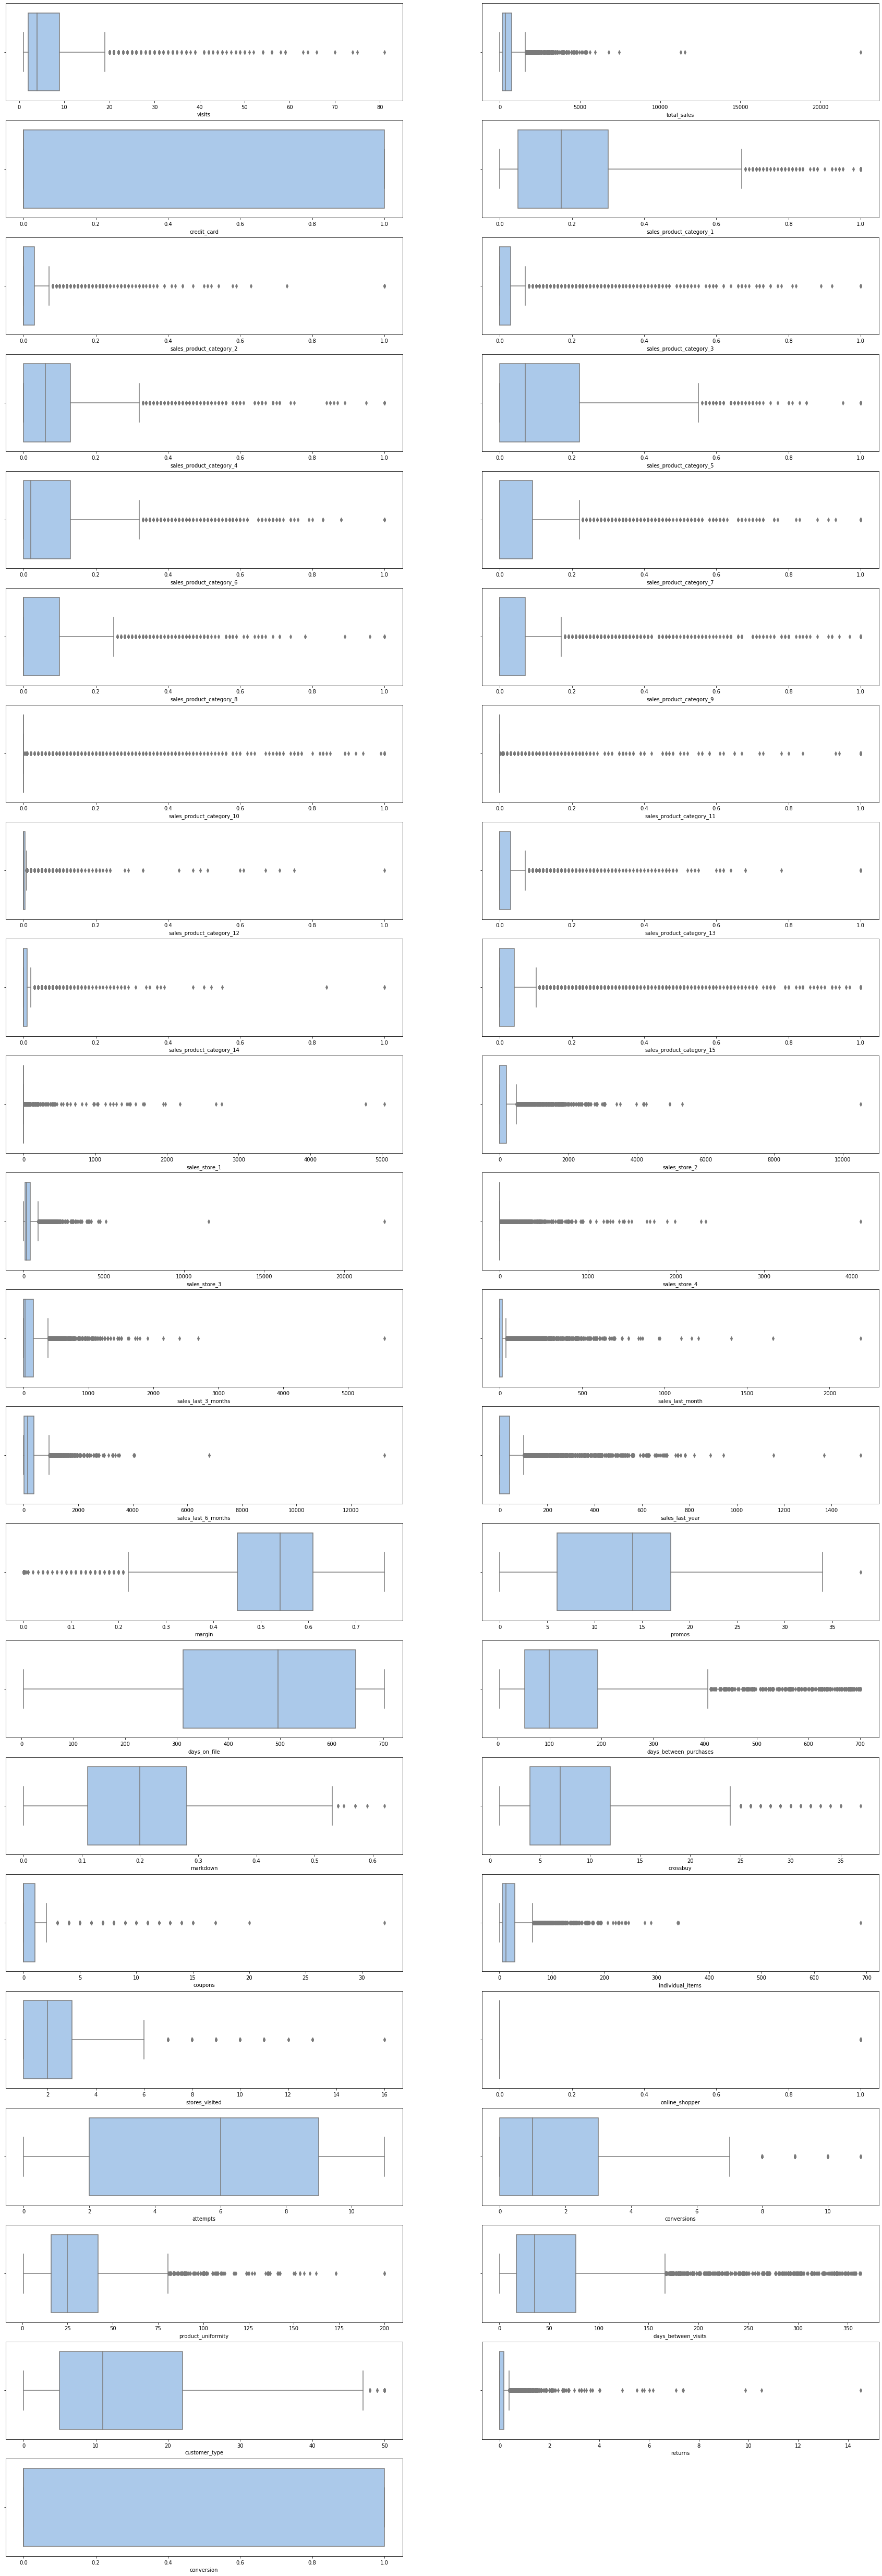

In [7]:
subplot_box(train[continues])

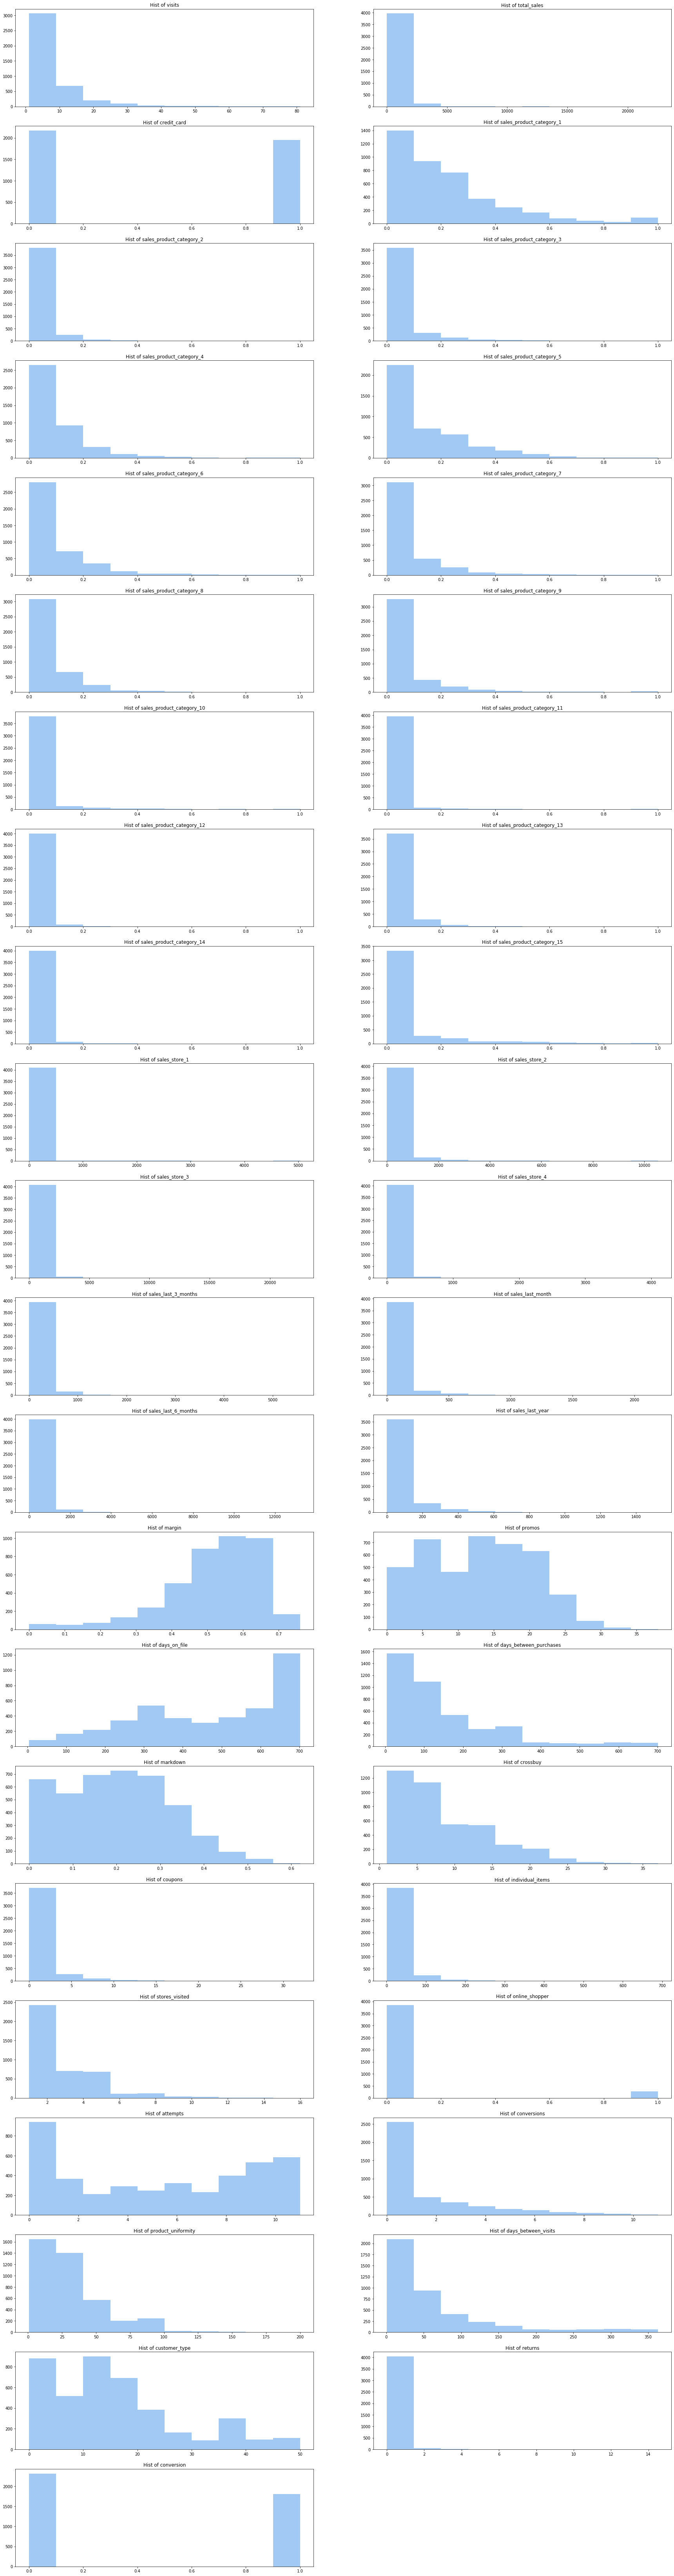

In [8]:
subplot_hist(train[continues])

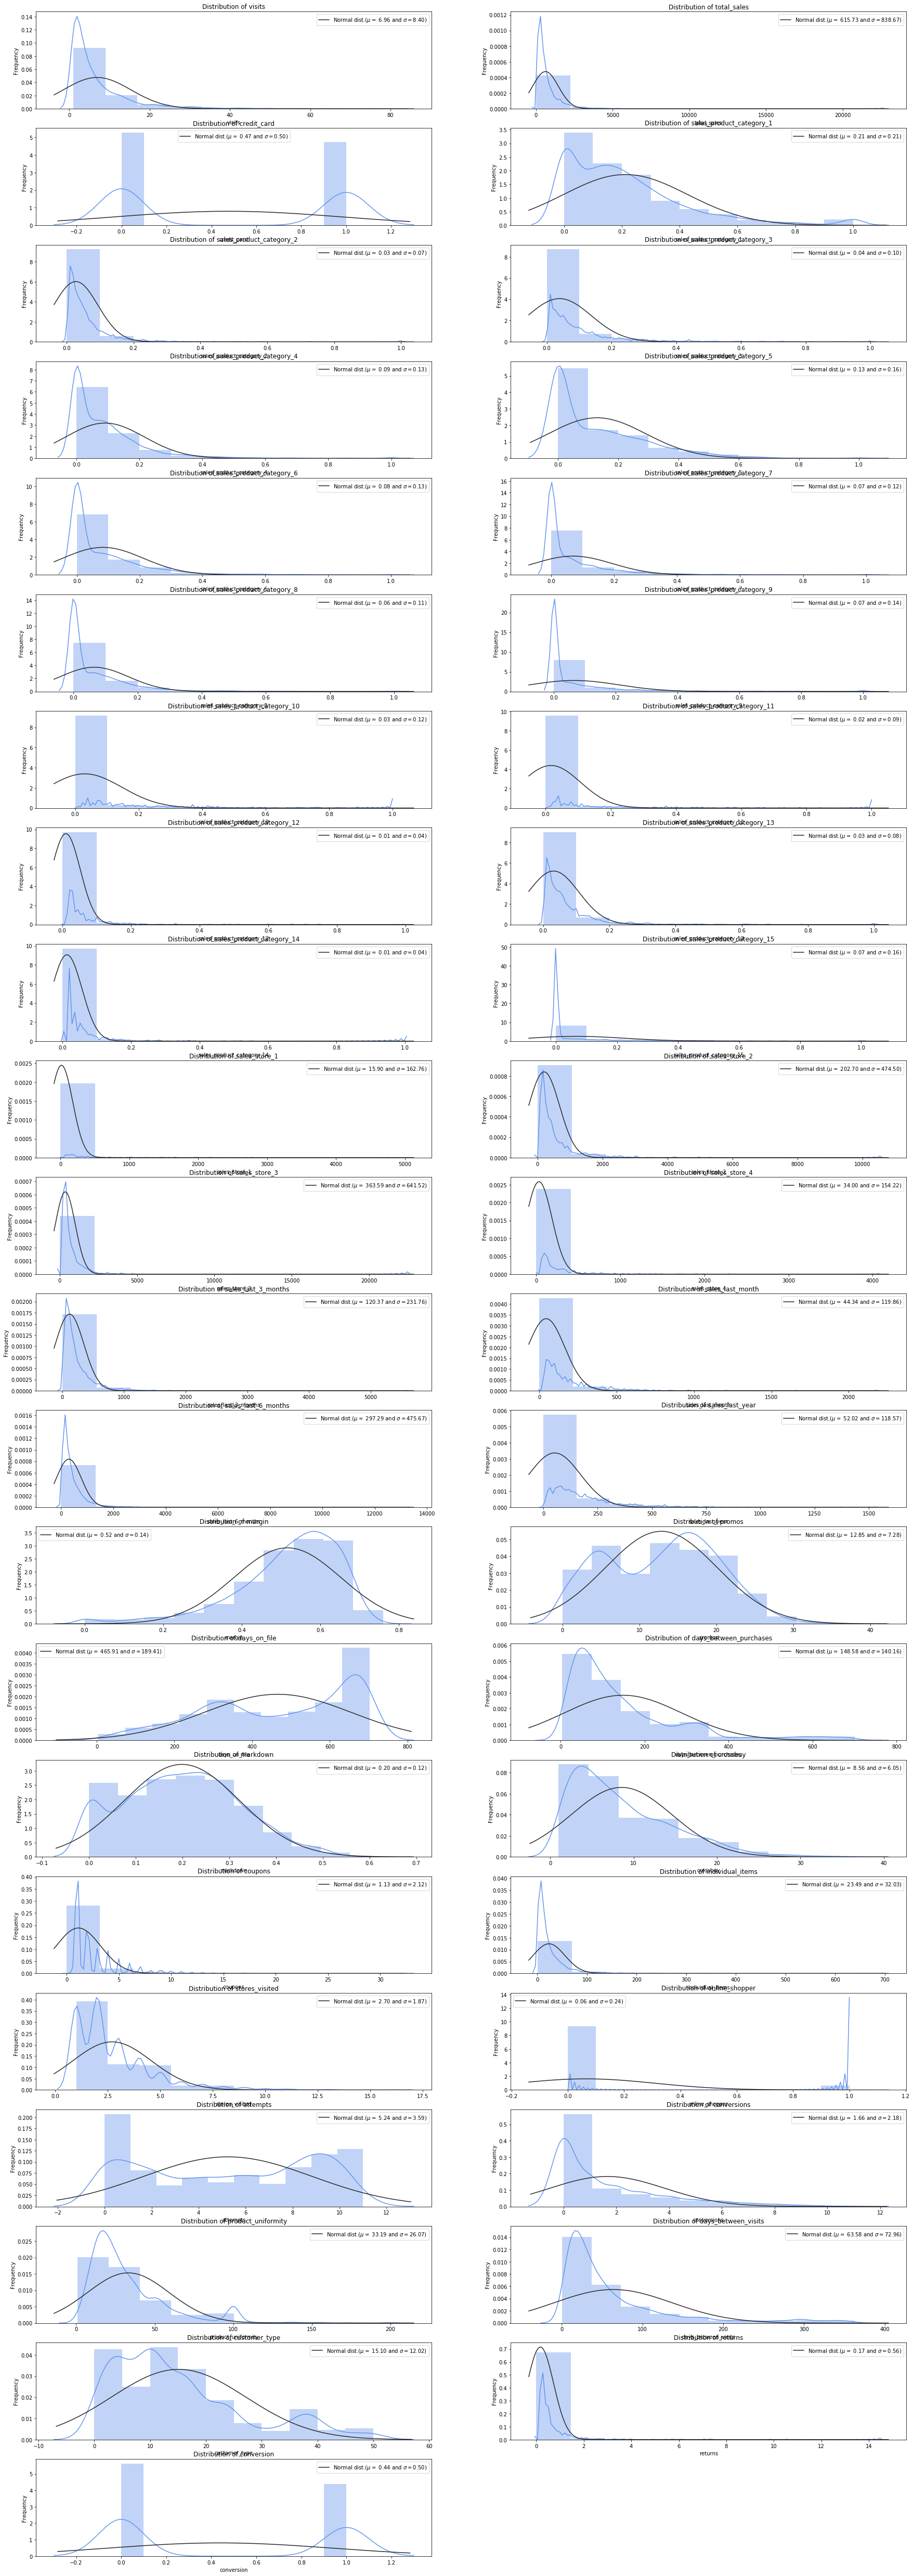

In [9]:
subplot_distributed(train[continues])

In [10]:
get_status(train).iloc[:,:11]

,visits,total_sales,credit_card,sales_product_category_1,sales_product_category_2,sales_product_category_3,sales_product_category_4,sales_product_category_5,sales_product_category_6,sales_product_category_7,sales_product_category_8
count,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000
mean,6.956,615.731,0.474,0.213,0.027,0.039,0.091,0.129,0.083,0.070,0.064
min,1.000,4.180,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,163.180,0.000,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,4.000,349.960,0.000,0.170,0.000,0.000,0.060,0.070,0.020,0.000,0.000
75%,9.000,738.510,1.000,0.300,0.030,0.030,0.130,0.220,0.130,0.090,0.100
max,81.000,22511.490,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
median,4.000,349.960,0.000,0.170,0.000,0.000,0.060,0.070,0.020,0.000,0.000
mad,5.578,494.821,0.499,0.161,0.035,0.056,0.086,0.129,0.092,0.083,0.074
var,70.525,703540.931,0.249,0.046,0.004,0.010,0.016,0.026,0.016,0.015,0.011


In [11]:
get_status(train).iloc[:,11:21]

,sales_product_category_9,sales_product_category_10,sales_product_category_11,sales_product_category_12,sales_product_category_13,sales_product_category_14,sales_product_category_15,sales_store_1,sales_store_2,sales_store_3
count,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000
mean,0.065,0.030,0.017,0.011,0.031,0.013,0.067,15.896,202.701,363.585
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.010
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,80.992
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,171.975
75%,0.070,0.000,0.000,0.003,0.030,0.009,0.040,0.000,192.378,407.042
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5035.580,10526.430,22511.490
median,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,171.975
mad,0.087,0.053,0.030,0.017,0.042,0.019,0.099,30.152,263.381,330.774
var,0.021,0.014,0.008,0.002,0.006,0.002,0.025,26495.832,225202.508,411645.259


In [12]:
get_status(train).iloc[:,21:]

,sales_store_4,sales_last_3_months,sales_last_month,sales_last_6_months,sales_last_year,margin,promos,days_on_file,days_between_purchases,markdown,...,stores_visited,phone_on_file,online_shopper,attempts,conversions,product_uniformity,days_between_visits,customer_type,returns,conversion
count,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,...,4122.000,4122,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000,4122.000
mean,34.004,120.369,44.337,297.294,52.018,0.516,12.854,465.909,148.582,0.199,...,2.702,NaN,0.064,5.244,1.662,33.186,63.583,15.103,0.173,0.438
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,4.000,0.000,...,1.000,N,0.000,0.000,0.000,0.750,0.660,0.000,0.000,0.000
25%,0.000,0.000,0.000,15.000,0.000,0.450,6.000,312.000,51.585,0.110,...,1.000,NaN,0.000,2.000,0.000,15.825,17.472,5.000,0.000,0.000
50%,0.000,23.165,0.000,150.650,0.000,0.540,14.000,496.000,99.235,0.200,...,2.000,NaN,0.000,6.000,1.000,24.920,35.660,11.000,0.000,0.000
75%,0.000,151.985,15.000,383.422,39.988,0.610,18.000,646.000,193.495,0.280,...,3.000,NaN,0.000,9.000,3.000,41.802,77.180,22.000,0.150,1.000
max,4099.920,5562.460,2189.000,13224.070,1522.830,0.760,38.000,702.000,701.000,0.620,...,16.000,Y,1.000,11.000,11.000,200.000,363.000,50.000,14.510,1.000
median,0.000,23.165,0.000,150.650,0.000,0.540,14.000,496.000,99.235,0.200,...,2.000,NaN,0.000,6.000,1.000,24.920,35.660,11.000,0.000,0.000
mad,57.660,139.705,67.331,283.360,76.235,0.104,6.189,167.143,103.456,0.101,...,1.385,NaN,0.120,3.209,1.712,19.117,51.302,9.452,0.235,0.492
var,23789.109,53724.200,14370.707,226317.229,14062.970,0.019,53.074,35884.867,19649.798,0.015,...,3.510,NaN,0.060,12.876,4.757,679.967,5324.552,144.440,0.310,0.246


* visits total_sales individual_items  偏度太高，可能要分层
    
* sales_product_category_X sales_store_X sales_last_3_months sales_last_month sales_last_6_months sales_last_year 
coupons returns conversions 有大量的0 

* margin days_between_purchases crossbuy stores_visited product_uniformity days_between_visits 偏度高
* customer_type 离散的
* "credit_card", "online_shopper"  binary的

###  Features Classification

In [13]:
category = ["phone_on_file"]

binary = ["credit_card", "online_shopper"]
discrete = ["customer_type"]

high_skew = ["visits", "total_sales", "individual_items", "margin", "days_between_purchases",
             "crossbuy", "stores_visited", "product_uniformity", "days_between_visits", "sales_store_3"]

all_right = ["promos", "days_on_file", "markdown", "attempts"]

response = ["conversion"]

many_zeros = list(train.columns.drop(
    category + binary + discrete + response + high_skew + all_right))

## Numerical Features

### All_right Features

          promos  days_on_file  markdown  attempts
count   4122.000      4122.000  4122.000  4122.000
mean      12.854       465.909     0.199     5.244
min        0.000         4.000     0.000     0.000
25%        6.000       312.000     0.110     2.000
50%       14.000       496.000     0.200     6.000
75%       18.000       646.000     0.280     9.000
max       38.000       702.000     0.620    11.000
median    14.000       496.000     0.200     6.000
mad        6.189       167.143     0.101     3.209
var       53.074     35884.867     0.015    12.876
std        7.285       189.433     0.124     3.588
skew       0.009        -0.418     0.205    -0.079
kurt      -0.877        -1.038    -0.525    -1.433


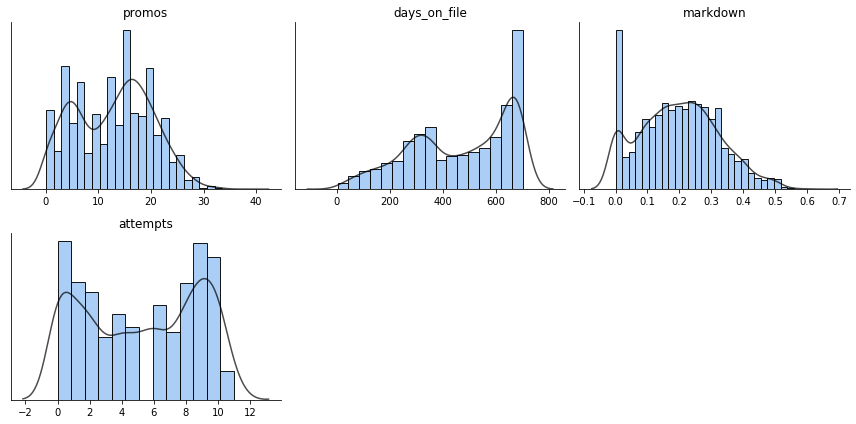

In [14]:
eda_continue(train[all_right])

### High_skew Features

          visits  total_sales  individual_items    margin  \
count   4122.000     4122.000          4122.000  4122.000   
mean       6.956      615.731            23.490     0.516   
min        1.000        4.180             1.000     0.000   
25%        2.000      163.180             6.000     0.450   
50%        4.000      349.960            13.000     0.540   
75%        9.000      738.510            29.000     0.610   
max       81.000    22511.490           689.000     0.760   
median     4.000      349.960            13.000     0.540   
mad        5.578      494.821            19.738     0.104   
var       70.525   703540.931          1025.930     0.019   
std        8.398      838.773            32.030     0.137   
skew       2.991        7.298             5.069    -1.272   
kurt      12.574      132.062            58.914     1.955   

        days_between_purchases  crossbuy  stores_visited  product_uniformity  \
count                 4122.000  4122.000        4122.000         

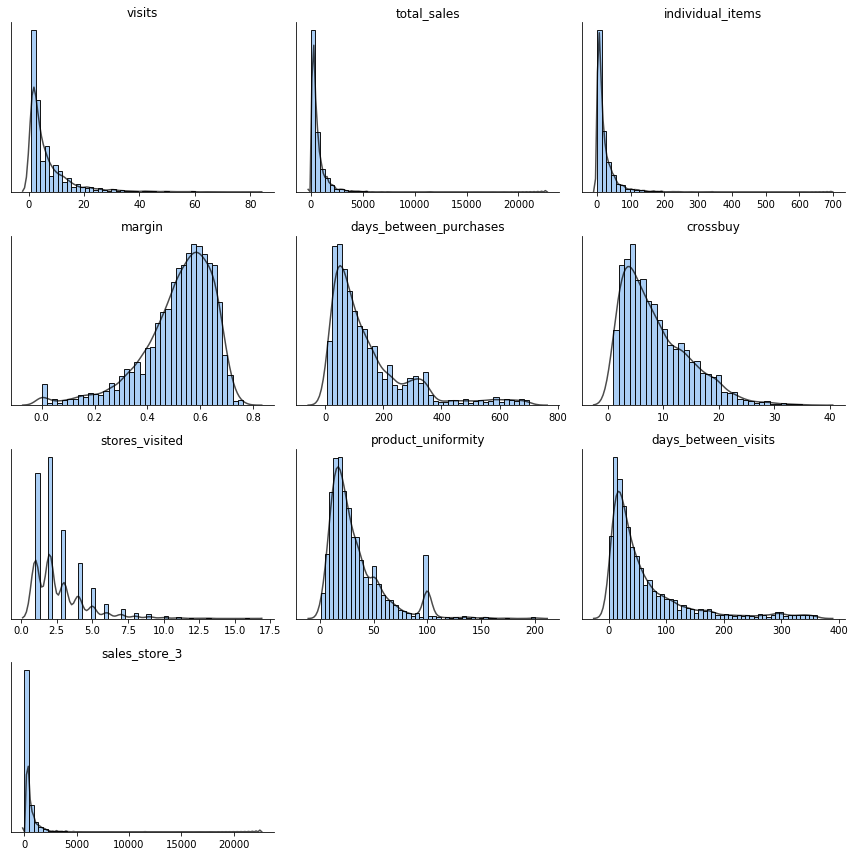

In [15]:
eda_continue(train[high_skew])

#### Use box-cox and yeoj

In [16]:
dict_Power_method = {
    "visits": 0,
    "total_sales": 0,
    "individual_items": 0,
    "margin": 1, # 有 non-positive 只能用yeo-johnson 
    "days_between_purchases": 0,
    "crossbuy": 0,
    "stores_visited": 0,
    "product_uniformity": 0,
    "days_between_visits": 0,
    "sales_store_3": 0,
    
}


boxcox = PowerTransformer(method='box-cox')
yeoj = PowerTransformer(method='yeo-johnson')

def creat_powerTransformer_df(df,cols,dict_Power_method):
    trans = pd.DataFrame()
    for col in cols:
        if dict_Power_method[col] == 0:
            trans[col] = boxcox.fit_transform(pd.DataFrame(df[col])).flatten()
        elif dict_Power_method[col] == 1:
            trans[col] = yeoj.fit_transform(pd.DataFrame(df[col])).flatten()
    return trans


# trans_high_skew = pd.DataFrame()
# for col in high_skew:
#     if dict_Power_method[col] == 0:
#         trans_high_skew[col] = boxcox.fit_transform(pd.DataFrame(train[col])).flatten()
#     elif dict_Power_method[col] == 1:
#         trans_high_skew[col] = yeoj.fit_transform(pd.DataFrame(train[col])).flatten()
trans_high_skew = creat_powerTransformer_df(train, high_skew, dict_Power_method)

          visits  total_sales  individual_items    margin  \
count   4122.000     4122.000          4122.000  4122.000   
mean      -0.000       -0.000             0.000     0.000   
min       -1.480       -4.466            -2.371    -2.287   
25%       -0.690       -0.756            -0.684    -0.717   
50%        0.034       -0.015             0.022    -0.004   
75%        0.805        0.701             0.741     0.698   
max        2.535        3.854             3.443     2.751   
median     0.034       -0.015             0.022    -0.004   
mad        0.840        0.816             0.819     0.820   
var        1.000        1.000             1.000     1.000   
std        1.000        1.000             1.000     1.000   
skew       0.039       -0.000             0.004    -0.133   
kurt      -0.921        0.045            -0.450    -0.555   

        days_between_purchases  crossbuy  stores_visited  product_uniformity  \
count                 4122.000  4122.000        4122.000         

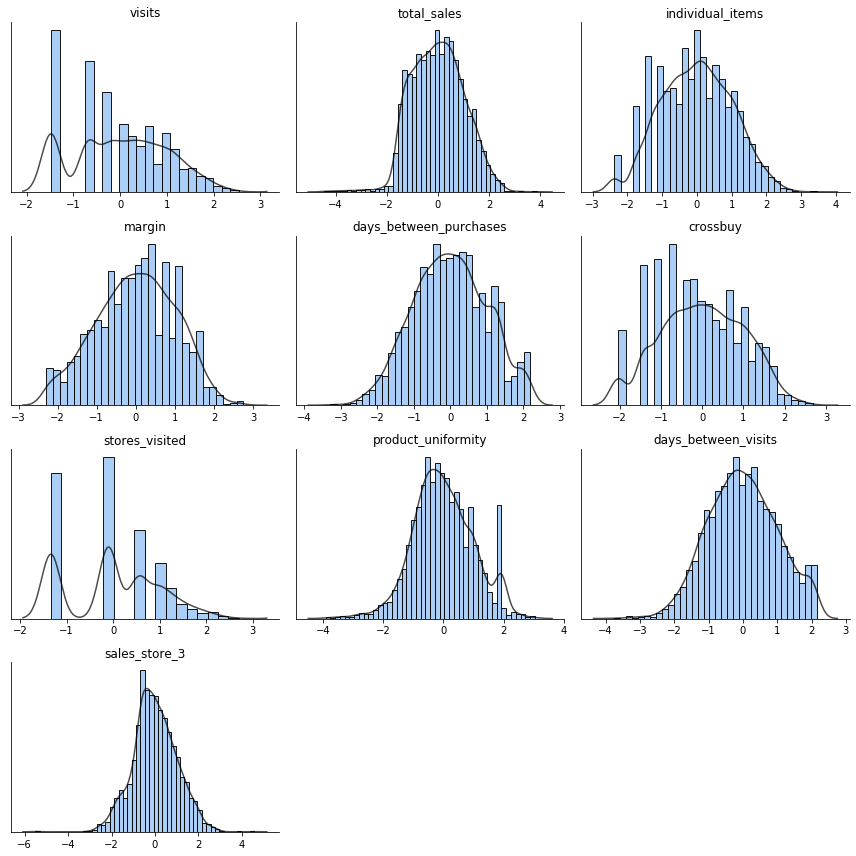

In [17]:
eda_continue(trans_high_skew)

### Many_zeros Features

        sales_product_category_1  sales_product_category_2  \
count                   4122.000                  4122.000   
mean                       0.213                     0.027   
min                        0.000                     0.000   
25%                        0.050                     0.000   
50%                        0.170                     0.000   
75%                        0.300                     0.030   
max                        1.000                     1.000   
median                     0.170                     0.000   
mad                        0.161                     0.035   
var                        0.046                     0.004   
std                        0.215                     0.066   
skew                       1.530                     7.099   
kurt                       2.659                    80.159   

        sales_product_category_3  sales_product_category_4  \
count                   4122.000                  4122.000   
mean   

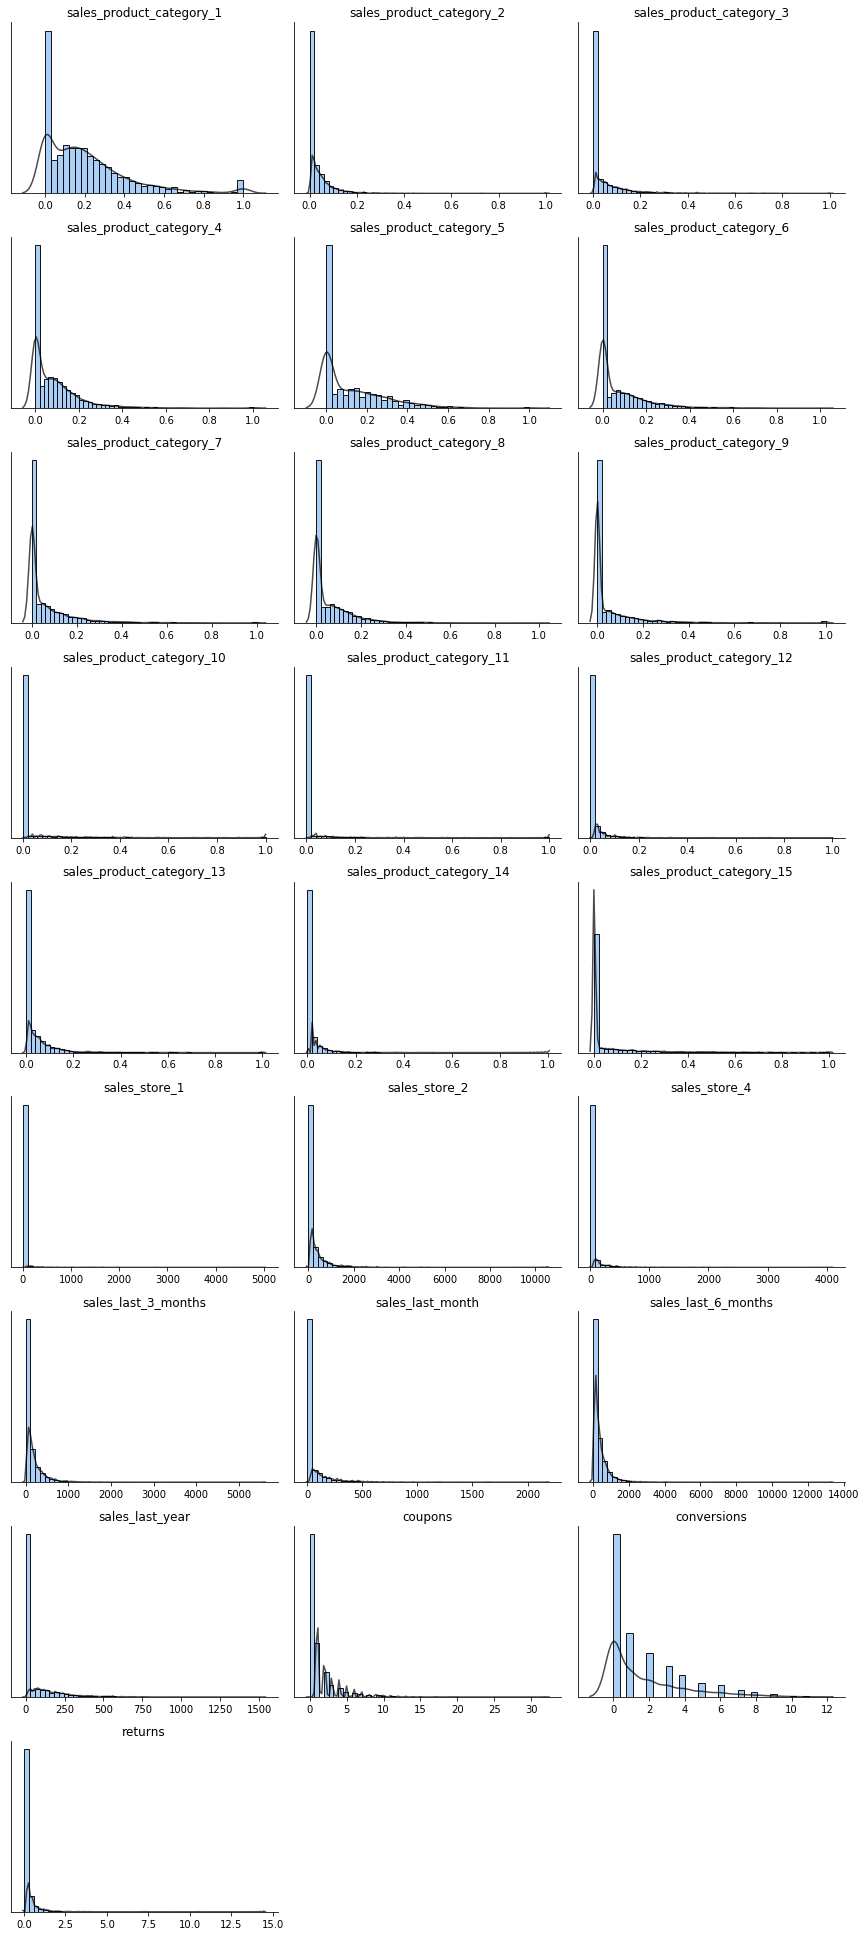

In [18]:
eda_continue(train[many_zeros])

In [19]:
def deal_many_zeros(df,many_zeros_cols):
    temp = pd.DataFrame()
    for col in many_zeros_cols:
        temp[col + "NA"] = (df[col]<1e-7).astype(int)
    return temp
    


# temp = pd.DataFrame()
# for col in many_zeros:
#     temp[col + "NA"] = (train[col]<1e-7).astype(int)
temp = deal_many_zeros(train, many_zeros)

In [20]:
def crosstab_all(target_series, df_cate_var):
    for i, col in enumerate(list(df_cate_var.columns)):
        table = pd.crosstab(target_series, df_cate_var.iloc[:,i])
        table = (table/table.sum()).iloc[1,:]
        print(table)
        
def eda_category(target_series, cate_series):
    crosstab_all(target_series, cate_series)
    crosstabplots(cate_series, target_series)


sales_product_category_1NA
0    0.490624
1    0.241657
Name: 1, dtype: float64
sales_product_category_2NA
0    0.589474
1    0.320242
Name: 1, dtype: float64
sales_product_category_3NA
0    0.589078
1    0.354912
Name: 1, dtype: float64
sales_product_category_4NA
0    0.528116
1    0.279195
Name: 1, dtype: float64
sales_product_category_5NA
0    0.529437
1    0.315730
Name: 1, dtype: float64
sales_product_category_6NA
0    0.543694
1    0.326683
Name: 1, dtype: float64
sales_product_category_7NA
0    0.555879
1    0.320736
Name: 1, dtype: float64
sales_product_category_8NA
0    0.549461
1    0.328846
Name: 1, dtype: float64
sales_product_category_9NA
0    0.571429
1    0.352707
Name: 1, dtype: float64
sales_product_category_10NA
0    0.517442
1    0.426789
Name: 1, dtype: float64
sales_product_category_11NA
0    0.650510
1    0.415818
Name: 1, dtype: float64
sales_product_category_12NA
0    0.608897
1    0.377588
Name: 1, dtype: float64
sales_product_category_13NA
0    0.581573
1    0.

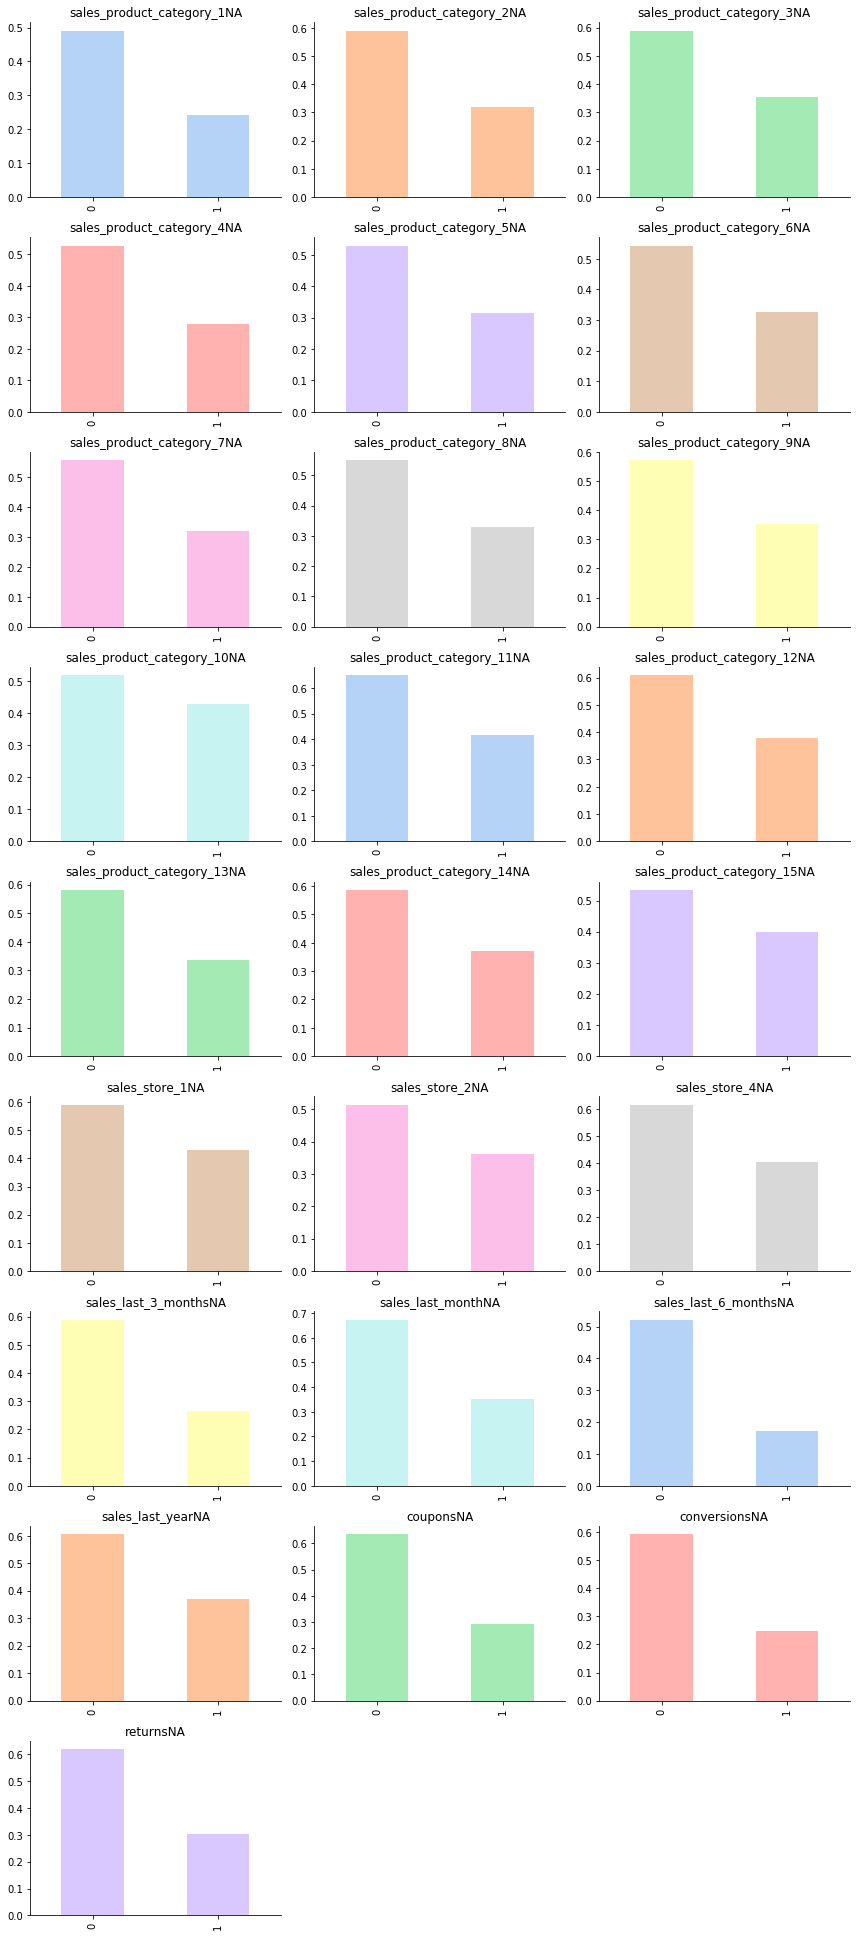

In [21]:
eda_category(train[response[0]], temp)

In [22]:
# table=pd.crosstab(train[response[0]], temp.iloc[:,0])
# table = (table/table.sum())
#.iloc[1,:]
# (table.T).sort_index().plot(kind='bar', alpha=0.8, ax=ax, color=colors[i % len(colors)])

In [23]:
# table

In [24]:
# table.iloc[1,:]

In [25]:
# table

In [26]:
# table.sum()

In [27]:
# (table/table.sum()).iloc[1,:]

In [28]:
# (table/table.sum())

#### Use box-cox and yeoj

In [29]:
dict_many_zeros = {
    'sales_product_category_1': 1, # must
    'sales_product_category_2': 1, # must
    'sales_product_category_3': 1, # must
    'sales_product_category_4': 1, # must
    'sales_product_category_5': 1, # must
    'sales_product_category_6': 1, # must
    'sales_product_category_7': 1, # must
    'sales_product_category_8': 1, # must
    'sales_product_category_9': 1, # must
    'sales_product_category_10': 1, # must
    'sales_product_category_11': 1, # must
    'sales_product_category_12': 1, # must
    'sales_product_category_13': 1, # must
    'sales_product_category_14': 1, # must
    'sales_product_category_15': 1, # must
    'sales_store_1': 1, # must
    'sales_store_2': 1, # must
    'sales_store_4': 1, # must
    'sales_last_3_months': 1, # must
    'sales_last_month': 1, # must
    'sales_last_6_months': 1, # must
    'sales_last_year': 1, # must
    'coupons': 1, # must
    'conversions': 1, # must
    'returns': 1, # must 
}
dict_Power_method.update(dict_many_zeros)

trans_many_zeros = creat_powerTransformer_df(train, many_zeros, dict_Power_method)


        sales_product_category_1  sales_product_category_2  \
count                   4122.000                  4122.000   
mean                       0.000                     0.000   
min                       -1.362                    -0.761   
25%                       -0.854                    -0.761   
50%                        0.061                    -0.761   
75%                        0.730                     0.813   
max                        2.129                     2.049   
median                     0.061                    -0.761   
mad                        0.843                     0.887   
var                        1.000                     1.000   
std                        1.000                     1.000   
skew                       0.141                     0.858   
kurt                      -0.965                    -0.876   

        sales_product_category_3  sales_product_category_4  \
count                   4122.000                  4122.000   
mean   

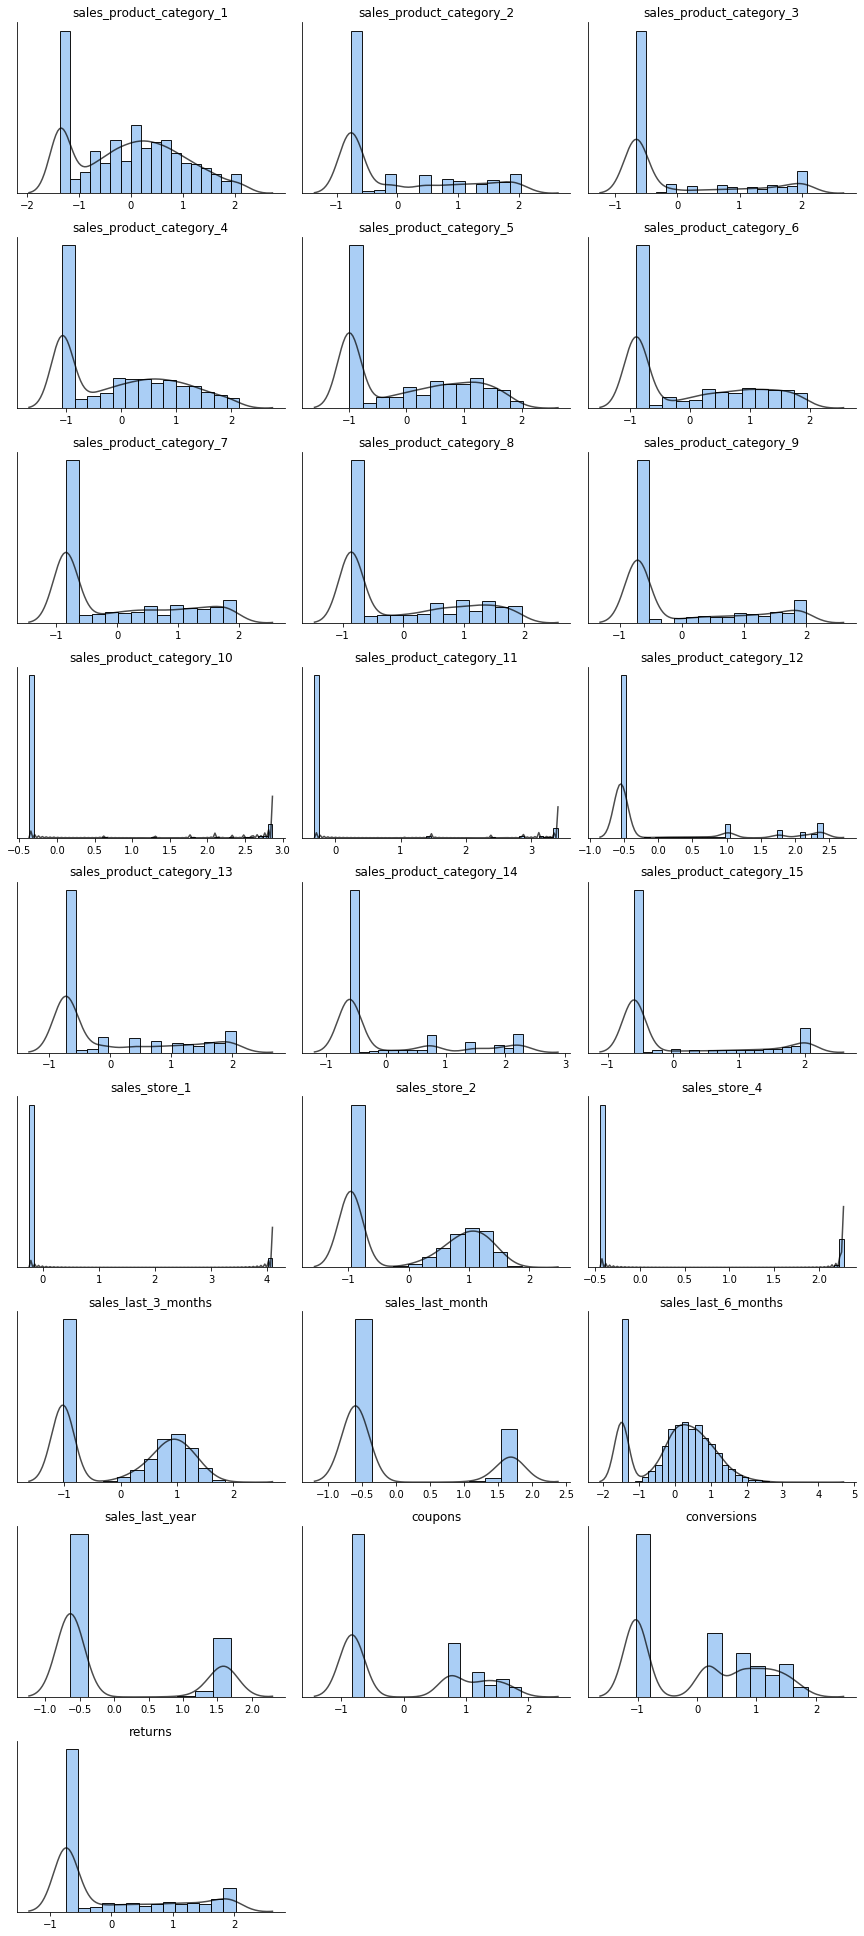

In [30]:
eda_continue(trans_many_zeros)

## Category Features

In [31]:
def dummy_cols(df, cols):
    d = pd.DataFrame()
    for col in cols:
        dummies = pd.get_dummies(
            df[col], prefix_sep="_", drop_first=True, prefix=col)
        #df.drop(columns=col, inplace=True)
        d = pd.concat([d, dummies], axis=1)

    return d


In [32]:
train[discrete]

,customer_type
0,37
1,12
2,28
3,5
4,15
5,35
6,4
7,4
8,11
9,10


### Discrete Features

customer_type
0     0.500000
1     0.463014
2     0.395349
3     0.450704
4     0.395706
5     0.478788
6     0.417391
7     0.500000
8     0.453202
9     0.400000
10    0.442000
11    0.456311
12    0.408759
13    0.454545
14    0.388889
15    0.408602
16    0.406250
17    0.444444
18    0.519553
19    1.000000
20    0.411111
21    0.600000
22    0.507246
23    0.479730
24    0.414286
25    0.455446
26    0.500000
27    0.250000
28    0.377778
29    0.300000
30    0.652174
31    0.416667
32    0.315789
33    0.500000
34    0.454545
35    0.352941
36    0.500000
37    0.400000
38    0.431373
39    0.522727
40    0.425000
41    0.529412
42    0.296296
43    0.111111
44    0.000000
45    0.300000
46    0.320000
47    0.000000
48    0.500000
49    0.666667
50    0.509434
Name: 1, dtype: float64


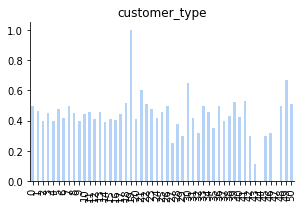

In [33]:
eda_category(train[response[0]], train[discrete])

In [34]:
pd.crosstab(index=train[discrete[0]], columns="count")

col_0,count
customer_type,
0,6
1,365
2,43
3,142
4,326
5,165
6,115
7,28
8,203


customer_type_1
0    0.435720
1    0.463014
Name: 1, dtype: float64
customer_type_2
0    0.438588
1    0.395349
Name: 1, dtype: float64
customer_type_3
0    0.437688
1    0.450704
Name: 1, dtype: float64
customer_type_4
0    0.441781
1    0.395706
Name: 1, dtype: float64
customer_type_5
0    0.436442
1    0.478788
Name: 1, dtype: float64
customer_type_6
0    0.438732
1    0.417391
Name: 1, dtype: float64
customer_type_7
0    0.437714
1    0.500000
Name: 1, dtype: float64
customer_type_8
0    0.437356
1    0.453202
Name: 1, dtype: float64
customer_type_9
0    0.438183
1    0.400000
Name: 1, dtype: float64
customer_type_10
0    0.437604
1    0.442000
Name: 1, dtype: float64
customer_type_11
0    0.437181
1    0.456311
Name: 1, dtype: float64
customer_type_12
0    0.439147
1    0.408759
Name: 1, dtype: float64
customer_type_13
0    0.438049
1    0.454545
Name: 1, dtype: float64
customer_type_14
0    0.438571
1    0.388889
Name: 1, dtype: float64
customer_type_15
0    0.439533
1    0.40860

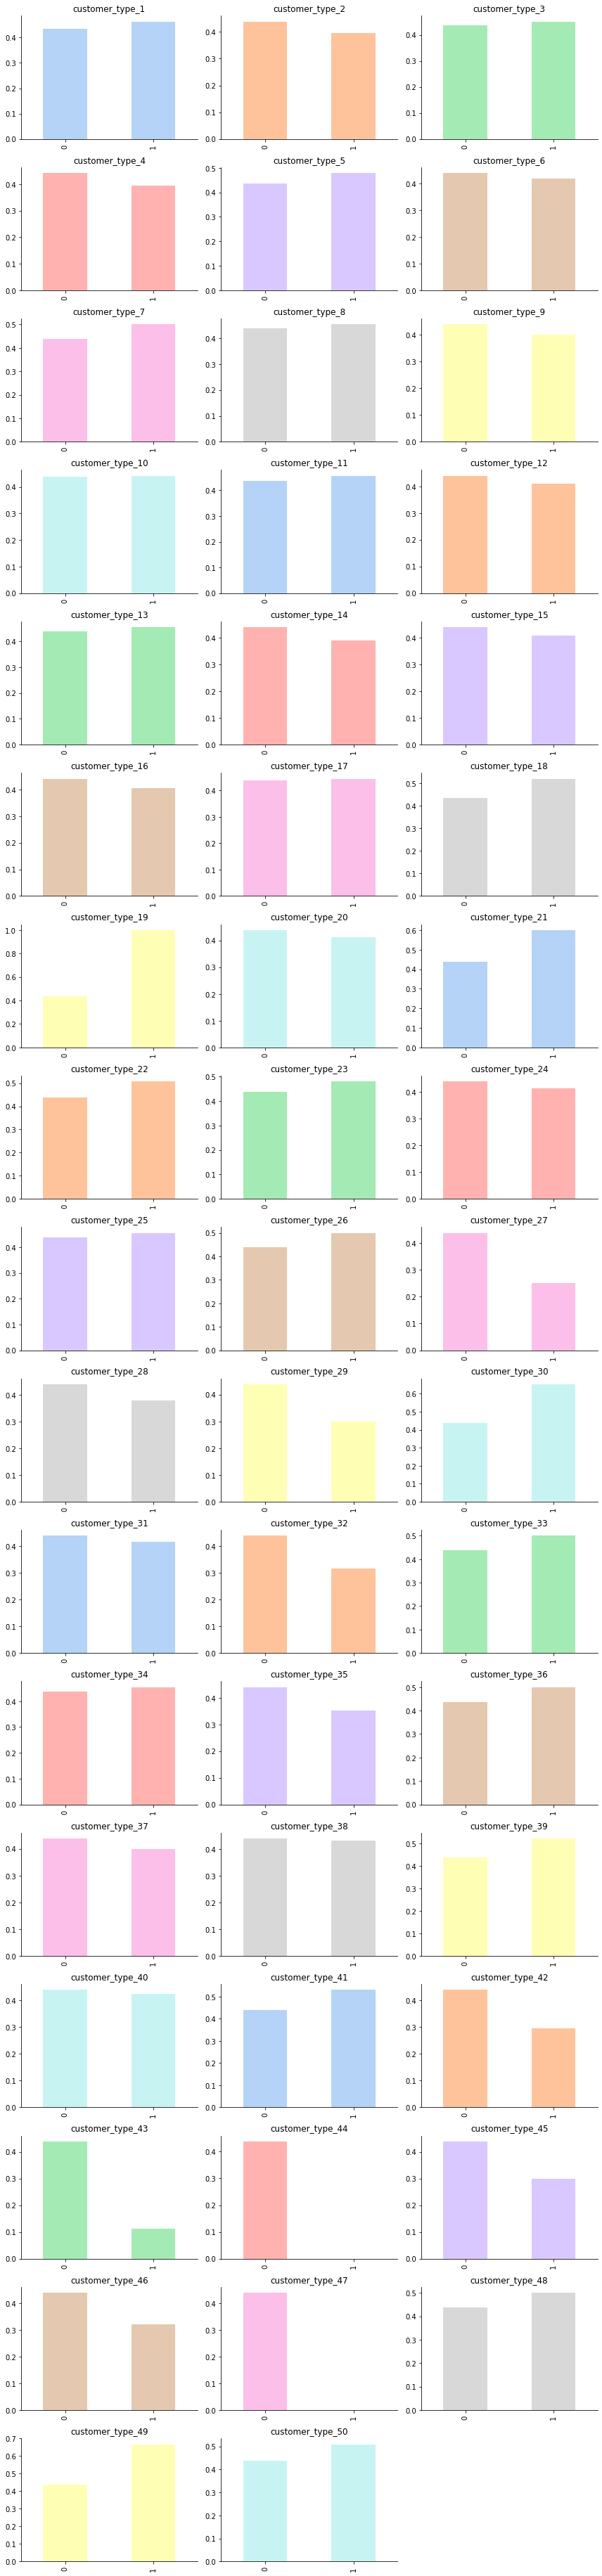

In [35]:
temp = dummy_cols(train, discrete)
eda_category(train[response[0]], temp)

### Category & Binary Features

phone_on_file_Y
0    0.214876
1    0.467839
Name: 1, dtype: float64
credit_card
0    0.285846
1    0.607271
Name: 1, dtype: float64
online_shopper
0    0.417574
1    0.738636
Name: 1, dtype: float64


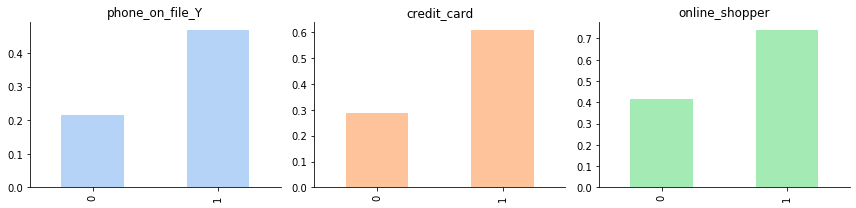

In [36]:
temp = pd.concat([dummy_cols(train, category),train[binary]], axis=1)

eda_category(train[response[0]], temp)

# Feature engingeering

In [37]:
def fe_target_var(df, response):
    return pd.DataFrame(df[response])

def fe_numerical_var(df):
    
    list_numberical = [df[all_right], 
                       creat_powerTransformer_df(df, high_skew, dict_Power_method),
                       deal_many_zeros(df, many_zeros),
                       creat_powerTransformer_df(df, many_zeros, dict_Power_method),
                      ]
    
    return pd.concat(list_numberical, axis=1)



def fe_categorical_var(df):
    return pd.concat([dummy_cols(df, discrete + category),df[binary]], axis=1)


def feature_eng(df, have_response=True):
    if have_response:
        return pd.concat([fe_target_var(df,response), fe_numerical_var(df), fe_categorical_var(df)], axis=1)
    else:
        return pd.concat([fe_numerical_var(df), fe_categorical_var(df)], axis=1)

In [38]:
fe_train = feature_eng(train)
fe_test = feature_eng(test, have_response=False)

In [39]:
fe_train.drop(["customer_type_44"], axis=1, inplace=True)

In [40]:
fe_train.shape

(4122, 117)

In [41]:
abs(fe_train.corr()[response[0]]).sort_values(ascending=False)[:50]

conversion                     1.000000
days_between_visits            0.559014
visits                         0.487690
individual_items               0.466327
crossbuy                       0.450580
total_sales                    0.421796
conversions                    0.411400
days_between_purchases         0.410128
sales_last_6_months            0.401499
product_uniformity             0.374124
coupons                        0.372588
sales_last_3_months            0.354305
conversionsNA                  0.346138
couponsNA                      0.339285
stores_visited                 0.330156
sales_last_3_monthsNA          0.325777
credit_card                    0.323469
returnsNA                      0.316373
promos                         0.304090
sales_last_6_monthsNA          0.301543
sales_last_month               0.287927
attempts                       0.285797
sales_last_monthNA             0.285346
sales_product_category_2NA     0.269216
returns                        0.254042


In [42]:
fe_test.shape

(4123, 116)

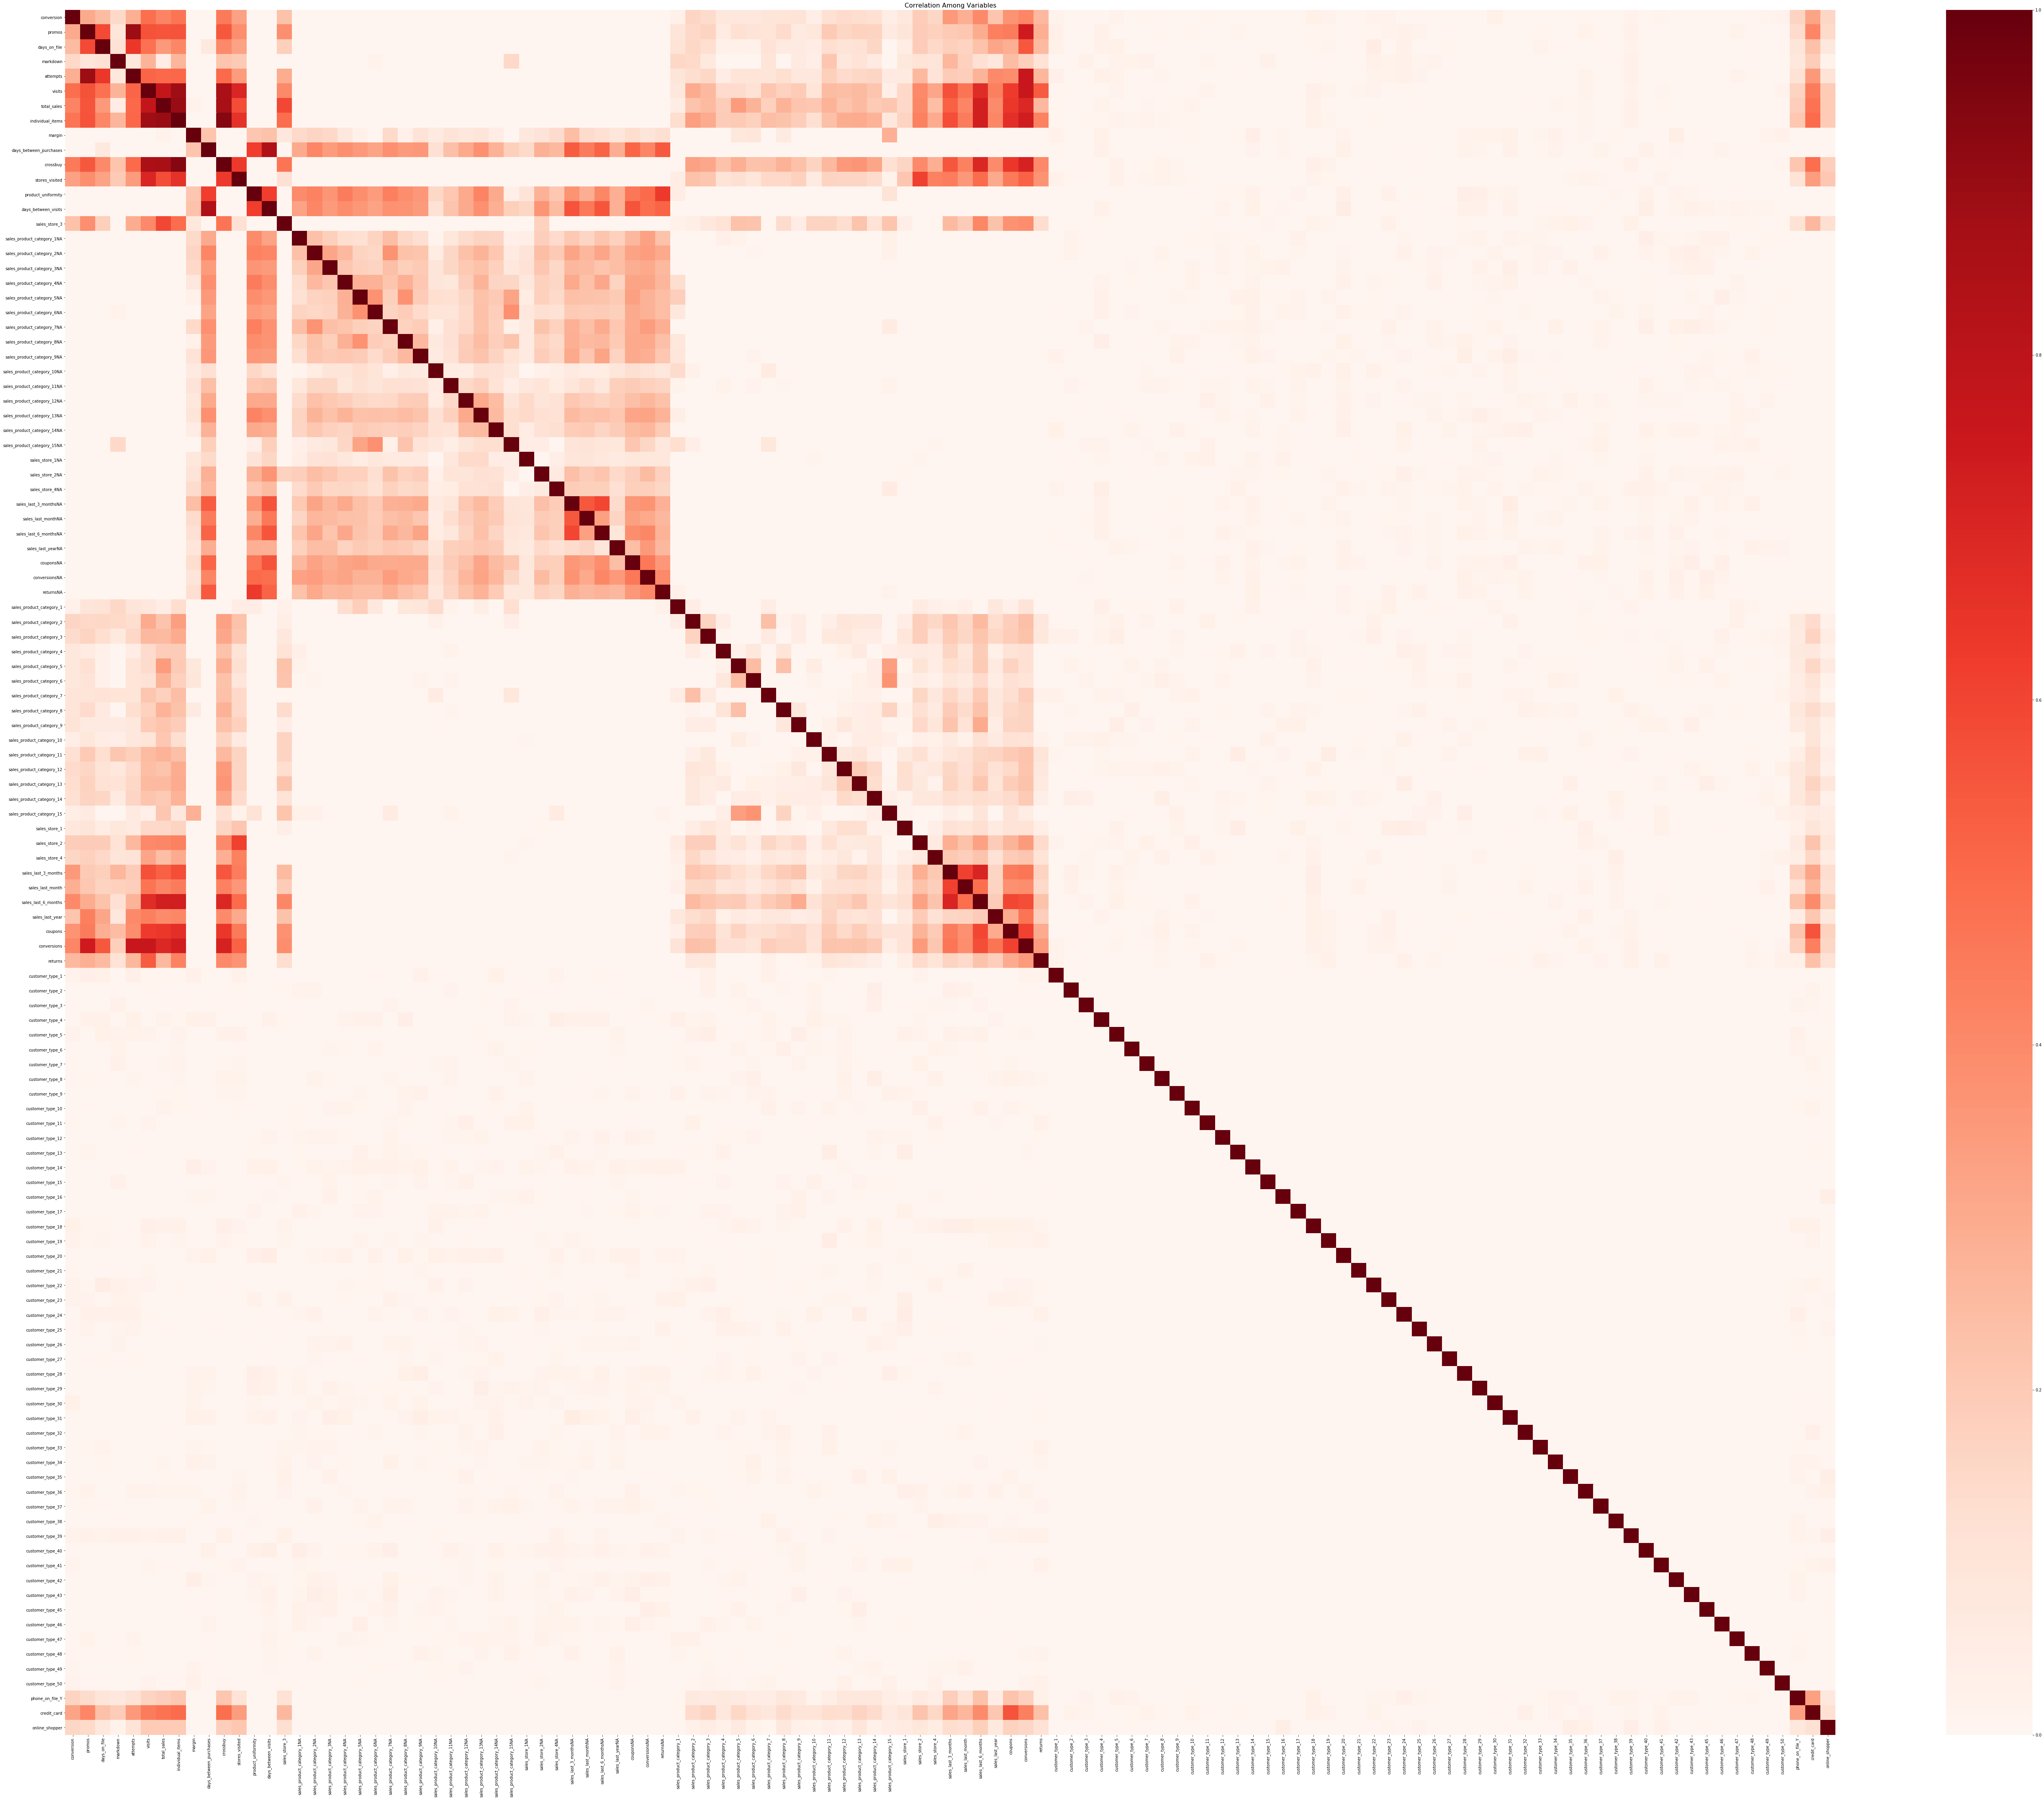

In [43]:
plt.figure(figsize=(100, 80))
sns.heatmap(fe_train.corr(), vmin=0, vmax=1, cmap='Reds')
plt.title('Correlation Among Variables', fontsize=16)
plt.savefig("corr")

In [44]:
# 根据 corr 和 共线性选择 feature selection 
selected_features = list(abs(fe_train.corr()[response[0]]).sort_values(ascending=False)[1:41].index)
fe_train = fe_train[selected_features+response]
fe_test = fe_test[selected_features]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    fe_train.iloc[:, :-1], fe_train["conversion"], train_size=0.7, random_state=0)

# Model

## Fitting a Simple Model logistic

Note the difference between the report and the Kaggle competition. For the report, you need to split the main data so that you can do model evaluation. In the Kaggle competition, the whole initial dataset becomes the training data. That's because the purpose of the Kaggle competition is for you to deploy your machine learning system after careful model building, selection and evaluation, as would be the case in actual business setting. 

In [66]:
logit = LogisticRegression(C=np.inf, solver='lbfgs')
logit.fit(X_train, y_train)

# Select the penalties by cross-validation
logit_l1= LogisticRegressionCV(Cs = 50, penalty='l1', solver='liblinear', scoring='neg_log_loss')
logit_l2= LogisticRegressionCV(Cs = 50, penalty='l2', solver='lbfgs', scoring='neg_log_loss')

logit_l1.fit(X_train, y_train)
logit_l2.fit(X_train, y_train)

# Refit the models using the best penalty
logit_l1= LogisticRegression(C = logit_l1.C_[0], penalty='l1', solver='liblinear')
logit_l2= LogisticRegression(C = logit_l2.C_[0], penalty='l2', solver='lbfgs')

logit_l1.fit(X_train, y_train)
logit_l2.fit(X_train, y_train)


# SVM

svm = SVC(gamma='auto',probability=True)
svm.fit(X_train, y_train)


# Naive Bayes
nbc = BernoulliNB()
nbc.fit(X_train, y_train)

# KNN


# DT
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [47]:

# def plot_roc(labels, predict_prob):
#     false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
#     roc_auc=auc(false_positive_rate, true_positive_rate)
#     plt.title('ROC')
#     plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
#     plt.legend(loc='lower right')
#     plt.plot([0,1],[0,1],'r--')
#     plt.ylabel('TPR')
#     plt.xlabel('FPR')



# probs = logit.predict_proba(X_test)
# preds = probs[:,1]
# fpr, tpr, threshold = roc_curve(y_test, preds)
# roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()


In [67]:
# random forest
tuning_parameters = {
    'n_estimators': np.arange(1, 200, 5),
    'max_depth': np.arange(1, 40, 2),
    "max_features": np.arange(0.2, 0.5, 0.1),
}

rf_search = RandomizedSearchCV(RandomForestClassifier(
), tuning_parameters, n_iter=1, cv=10, return_train_score=False, n_jobs=4)
rf_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [68]:
# GradientBoosting

tuning_parameters = {
    'learning_rate': np.arange(0.001,0.1,0.001),
    'n_estimators': np.arange(50,500,50),
    'max_depth': [2, 3, 4],
    'subsample': np.arange(0.1,1,0.1)
}

gb = RandomizedSearchCV(GradientBoostingClassifier(), tuning_parameters, n_iter=1, cv=10, return_train_score=False, n_jobs=4)
gb.fit(X_train, y_train)



RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [81]:
# xgboost 

# xgb_model = xgb.XGBClassifier()
# # xgb = GridSearchCV(xgb_model,
# #                        {'max_depth': [2, 4, 6],
# #                         'n_estimators': np.arange(10,200,10)}, verbose=1)
# # xgb.fit(X_train, y_train)
# xgb_model.fit(X_train, y_train)

In [76]:
columns = ['Sensitivity', 'Specificity', 'Precision',"Accuracy", 'AUC']
rows = ['Logistic', 'Logistic $\ell_1$', 'Logistic $\ell_2$',"SVM","Naive Bayes", "Decision Tree","Random Forest","Gradient Boosting"]
results = pd.DataFrame(0.0, columns=columns, index=rows)

methods = [logit, logit_l1, logit_l2,svm,nbc,dt,rf_search,gb]
y_prob = np.zeros((len(y_train), len(rows)))

for i, method in enumerate(methods):
    y_pred = method.predict(X_test)
    y_prob[:, i] = method.predict_proba(X_train)[:,1]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    
    results.iloc[i, 0] = tp/(tp+fn)
    results.iloc[i, 1] = tn/(tn+fp)
    results.iloc[i, 2] = tp/(tp+fp)
    results.iloc[i, 3] = (tp + tn)/(tp+tn+fp+fn)
    results.iloc[i, 4] = roc_auc_score(y_train, y_prob[:, i])

In [77]:
results

,Sensitivity,Specificity,Precision,Accuracy,AUC
Logistic,0.723282,0.798036,0.724665,0.766370,0.858258
Logistic $\ell_1$,0.732824,0.795231,0.724528,0.768795,0.862381
Logistic $\ell_2$,0.729008,0.792426,0.720755,0.765562,0.857868
SVM,0.595420,0.760168,0.645963,0.690380,0.961862
Naive Bayes,0.715649,0.730715,0.661376,0.724333,0.792830
Decision Tree,0.608779,0.723703,0.618217,0.675020,1.000000
Random Forest,0.688931,0.791024,0.707843,0.747777,0.984466
Gradient Boosting,0.597328,0.863955,0.763415,0.751011,0.864059


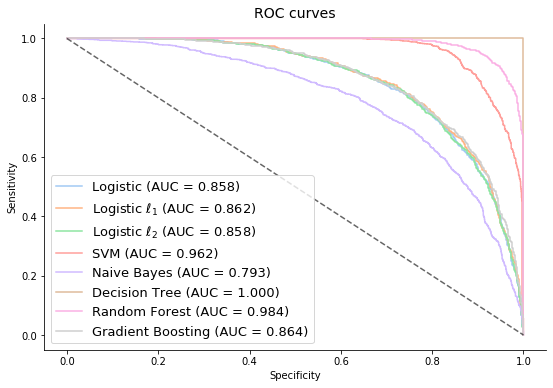

In [78]:
fig, ax = plot_roc_curves(y_train, y_prob, labels=pd.Series(rows))
plt.show()

In [80]:
rf_search.fit(fe_train.iloc[:, :-1], fe_train["conversion"])

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

## 3. Predictions and Submission File

In [83]:
X_test = fe_test.to_numpy()
y_prob = rf_search.predict_proba(X_test)[:,1]

In [84]:
submission = pd.DataFrame(y_prob)
submission.columns = ["conversion"]
submission.index.names = ['Id']

submission

,conversion
Id,
0,0.200025
1,0.856296
2,0.340793
3,0.211012
4,0.116636
5,0.139955
6,0.182624
7,0.137227
8,0.425117


In [85]:
submission.to_csv('submission00.csv') 

### Additional Code

The two cells below format the notebook for display online. Please omit them from your work.

In [58]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Source+Sans+Pro|Open+Sans:800&display=swap');
</style>

In [59]:
from IPython.core.display import HTML
style = open('../css/jupyter.css', "r").read()
HTML('<style>'+ style +'</style>')

FileNotFoundError: [Errno 2] No such file or directory: '../css/jupyter.css'